<a href="https://colab.research.google.com/github/zuzanna-w17/ML-course/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

# Libraries

In [ ]:
import numpy as np
import pandas as pd 
import sklearn # shortcut of scikit-learn

sklearn.__version__

'1.0.1'

# Data generating

In [ ]:
data = {
    "size": ["XL", "L", "M", "L", "M"],
    "color": ["red", "green", "blue", "green", "red"],
    "gender": ["female", "male", "male", "female", "female"],
    "price": [199.0, 89.0, 99.0, 129.0, 79.0],
    "weight": [500, 450, 300, 380, 410],
    "bought": ["yes", "no", "yes", "no", "yes"]
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [ ]:
# change type "object" of categorical variables
for col in ["size", "color", "gender", "bought"]:
  df[col] = df[col].astype("category")

df["weight"] = df["weight"].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 628.0 bytes


In [ ]:
# describe shows summary results only for numerical variables
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [ ]:
# show statistics of category variables
df.describe(include=["category"]).T

,count,unique,top,freq
size,5,3,M,2
color,5,3,red,2
gender,5,2,female,3
bought,5,2,yes,3


# Data coding

In [ ]:
from sklearn.preprocessing import LabelEncoder # class to be used only for dependent variable!!!

le = LabelEncoder() # class instant 
le.fit(df["bought"]) # fit coder to variable
le.transform(df["bought"]) # do mapping

array([1, 0, 1, 0, 1])

In [ ]:
# faster = fit & do mapping
le.fit_transform(df["bought"])

array([1, 0, 1, 0, 1])

In [ ]:
# apply changes
df["bought"] = le.fit_transform(df["bought"])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
# inverse mapping (before change)
le.inverse_transform(df["bought"])

array(['yes', 'no', 'yes', 'no', 'yes'], dtype=object)

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder # class to be used for independent variable!!!

encoder = OneHotEncoder(sparse=False) # to keep whole data matrix in memory
encoder.fit(df[["size"]])

OneHotEncoder(sparse=False)

In [ ]:
encoder.transform(df[["size"]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
encoder.categories_ # values: L, M, XL in the above matrix's columns

[array(['L', 'M', 'XL'], dtype=object)]

In [ ]:
# linear dependence to be removed (one column to be removed)
encoder = OneHotEncoder(drop="first", sparse=False)

encoder.fit(df[["size"]])
encoder.transform(df[["size"]])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
# get_dummies in Pandas - alternative to the above example
pd.get_dummies(data=df)

,price,weight,bought,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male
0,199.0,500.0,1,0,0,1,0,0,1,1,0
1,89.0,450.0,0,1,0,0,0,1,0,0,1
2,99.0,300.0,1,0,1,0,1,0,0,0,1
3,129.0,380.0,0,1,0,0,0,1,0,1,0
4,79.0,410.0,1,0,1,0,0,0,1,1,0


In [ ]:
# with linearity dependence removed
pd.get_dummies(data=df, drop_first=True)

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
# update new colnames
pd.get_dummies(data=df, drop_first=True, prefix="new")

,price,weight,bought,new_M,new_XL,new_green,new_red,new_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
# update new colnames
pd.get_dummies(data=df, drop_first=True, prefix_sep="-")

,price,weight,bought,size-M,size-XL,color-green,color-red,gender-male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
# only selected columns to be coded
pd.get_dummies(data=df, drop_first=True, columns=["size"])

,color,gender,price,weight,bought,size_M,size_XL
0,red,female,199.0,500.0,1,0,1
1,green,male,89.0,450.0,0,0,0
2,blue,male,99.0,300.0,1,1,0
3,green,female,129.0,380.0,0,0,0
4,red,female,79.0,410.0,1,1,0


# Standardize data

In [ ]:
df["price"]

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

In [ ]:
df["price"].mean()

119.0

In [ ]:
df["price"].std()

48.47679857416329

In [ ]:
# standarized
(df["price"] - df["price"].mean()) / df["price"].std()

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
def standarize(x):
  return (x - x.mean()) / x.std()

standarize(df["price"])

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
# inbuilt library
from sklearn.preprocessing import scale

# quite different values as estimator can be implemented as biased or unbiased variance estimator
scale(df["price"])

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["price"]])
scaler.transform(df[["price"]])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [ ]:
scaler_price = StandardScaler()
df["price"] = scaler_price.fit_transform(df[["price"]])

scaler_weight = StandardScaler()
df["weight"] = scaler_weight.fit_transform(df[["weight"]])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,1
1,L,green,male,-0.691898,0.623610,0
2,M,blue,male,-0.461266,-1.603567,1
3,L,green,female,0.230633,-0.415740,0
4,M,red,female,-0.922531,0.029696,1


# Data pre-processing

In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
le = LabelEncoder()

df["bought"] = le.fit_transform(df["bought"])

scaler = StandardScaler()
df[["price", "weight"]] = scaler.fit_transform(df[["price", "weight"]])

df = pd.get_dummies(data=df, drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0


# Missing data

In [ ]:
data = {
    "size": ["XL", "L", "M", np.nan, "M", "M"],
    "color": ["red", "green", "blue", "green", "red", "green"],
    "gender": ["female", "male", np.nan, "female", "female", "male"],
    "price": [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    "weight": [500, 450, 300, np.nan, 410, np.nan],
    "bought": ["yes", "no", "yes", "no", "yes", "no"]
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [ ]:
# find fields with missing data
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
# check summary of missing data in each variable
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
# check summary of total missing data
df.isnull().sum().sum()

5

In [ ]:
# class to fill in missig data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean") # strategy can be "constant" too, or "most_frequent" (the most common value)
imputer.fit(df[["weight"]]) # fit filling in missing data by mean 

SimpleImputer()

In [ ]:
imputer.statistics_ # check mean 

array([415.])

In [ ]:
# apply the fit
imputer.transform(df[["weight"]])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [ ]:
df[["weight"]] = imputer.transform(df[["weight"]])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df.fillna(value="missing")

,size,color,gender,price,weight,bought
0,XL,red,female,199,500.0,yes
1,L,green,male,89,450.0,no
2,M,blue,missing,missing,300.0,yes
3,missing,green,female,129,415.0,no
4,M,red,female,79,410.0,yes
5,M,green,male,89,415.0,no


In [ ]:
df["size"].fillna(value="L", inplace=True) # inplace assign the new value on a fly
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
# remove rows with missing data
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


# Missing data in time series

In [ ]:
data = {"price": [108, 108, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start="01-01-2020 09:00", end="01-01-2020 18:00", periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,108.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


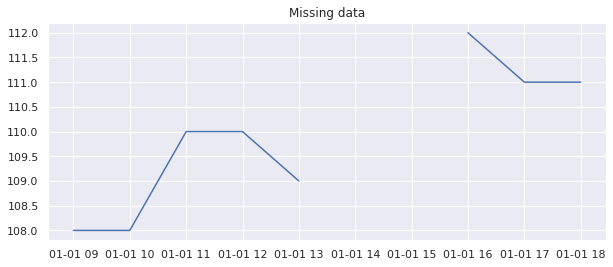

In [ ]:
# add plot libraries
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt # basic plot library
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title("Missing data")
_ = plt.plot(df.price)

In [ ]:
# interactive plots
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, "index", "price", width=600, height=400,
        title="Time series - missing data")

In [ ]:
# remove missing obs
df_plotly = df_plotly.dropna()

px.line(df_plotly, "index", "price", width=600, height=400,
         title="Time series - missing data")

In [ ]:
# substitute missing data by constant value
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(0)
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

In [ ]:
# substitute missing data by mean value
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(df_plotly["price"].mean())
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

In [ ]:
# substitute missing data by interpolation
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].interpolate()
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

In [ ]:
# substitute missing data by backward fill
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(method="bfill") # "ffile" is forward fill
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

# Ekstrakcja cech

In [ ]:
# import from stooq Amazon data
def fetch_financial_data(company="AMZN"):
  """
  Function fetches financial data
  """
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source="stooq")

df_raw = fetch_financial_data()
df_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-07,3276.78,3304.865,3240.6200,3251.08,2330295
2022-01-06,3269.01,3296.000,3238.7442,3265.08,2597889
2022-01-05,3337.66,3342.525,3287.1400,3287.14,3215136
2022-01-04,3408.76,3428.000,3326.9900,3350.44,3536258
2022-01-03,3351.00,3414.070,3323.2100,3408.09,3193457


In [ ]:
df = df_raw.copy()
df = df[:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-01-07 to 2022-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


In [ ]:
# generate new data
df["day"] = df.index.day
df["month"] = df.index.month
df["year"] = df.index.year
df

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2022-01-07,3276.78,3304.865,3240.6200,3251.08,2330295,7,1,2022
2022-01-06,3269.01,3296.000,3238.7442,3265.08,2597889,6,1,2022
2022-01-05,3337.66,3342.525,3287.1400,3287.14,3215136,5,1,2022
2022-01-04,3408.76,3428.000,3326.9900,3350.44,3536258,4,1,2022
2022-01-03,3351.00,3414.070,3323.2100,3408.09,3193457,3,1,2022


In [ ]:
# Discrete variable from continuous one
df = pd.DataFrame(data={"height": [175., 178.5, 185., 191., 184.5, 183., 168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [ ]:
# intervals done in an automated way
df["height_cat"] = pd.cut(x=df.height, bins=3)

# manual intervals
df["height_cat"] = pd.cut(x=df.height, bins=(160, 175, 180, 195))

# manual intervals + names
df["height_cat"] = pd.cut(x=df.height, bins=(160, 175, 180, 195), labels=["small", "medium", "high"])
df

,height,height_cat
0,175.0,small
1,178.5,medium
2,185.0,high
3,191.0,high
4,184.5,high
5,183.0,high
6,168.0,small


In [ ]:
pd.get_dummies(df, drop_first=True, prefix="height")

,height,height_medium,height_high
0,175.0,0,0
1,178.5,1,0
2,185.0,0,1
3,191.0,0,1
4,184.5,0,1
5,183.0,0,1
6,168.0,0,0


# Train, validation and test datasets

In [ ]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd 
import sklearn # shortcut of scikit-learn
import seaborn as sns # to visualize

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()
sklearn.__version__

'1.0.2'

In [5]:
from sklearn.datasets import load_iris

raw_data=load_iris() # it is dictonary
raw_data_copy=raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# prepare data
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n') # print 5 rows
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [8]:
# merge attibutes and target variables
all_data = np.c_[data, target]
all_data[:5]

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [10]:
# create data frame
df = pd.DataFrame(data=all_data, columns=raw_data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [13]:
df.describe() # data statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
df.describe().T.apply(lambda x: round(x, 2)) # data statistics

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [15]:
# distribution of target value
df.target.value_counts() # 3 classes - 0,1,2

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

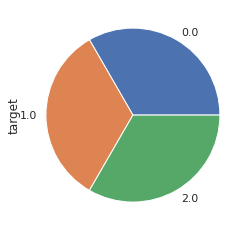

In [16]:
# distribution of target value - plot
df.target.value_counts().plot(kind='pie')

In [17]:
# separate x and y
data = df.copy()
target = data.pop('target') # take subset and remove from original

In [20]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

print(f'\nTest ratio: {len(X_test) / len(data):.2f}') # 25% is test
print(f'\ny_train:\n{y_train.value_counts()}') # distribution in train dataset
print(f'\ny_test:\n{y_test.value_counts()}') # distribution in test dataset

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)

Test ratio: 0.25

y_train:
1.0    39
2.0    38
0.0    35
Name: target, dtype: int64

y_test:
0.0    15
2.0    12
1.0    11
Name: target, dtype: int64


In [22]:
# split data into train and test - manipulate test/train size
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42) # train_size may be established too

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

print(f'\nTest ratio: {len(X_test) / len(data):.2f}') # 30% is test
print(f'\ny_train:\n{y_train.value_counts()}') # distribution in train dataset
print(f'\ny_test:\n{y_test.value_counts()}') # distribution in test dataset

X_train shape (105, 4)
y_train shape (105,)
X_test shape (45, 4)
y_test shape (45,)

Test ratio: 0.30

y_train:
1.0    37
2.0    37
0.0    31
Name: target, dtype: int64

y_test:
0.0    19
1.0    13
2.0    13
Name: target, dtype: int64


In [24]:
# split data into train and test - get target valiable's distribution to be equal among classes in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42, stratify=target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

print(f'\nTest ratio: {len(X_test) / len(data):.2f}') # 30% is test
print(f'\ny_train:\n{y_train.value_counts()}') # distribution in train dataset
print(f'\ny_test:\n{y_test.value_counts()}') # distribution in test dataset

X_train shape (135, 4)
y_train shape (135,)
X_test shape (15, 4)
y_test shape (15,)

Test ratio: 0.10

y_train:
0.0    45
2.0    45
1.0    45
Name: target, dtype: int64

y_test:
1.0    5
2.0    5
0.0    5
Name: target, dtype: int64


In [25]:
# another dataset
from sklearn.datasets import load_breast_cancer

raw_data=load_breast_cancer() # it is dictonary
raw_data_copy=raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
print(raw_data_copy['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
# prepare data
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n') # print 5 rows
print(target[:5])

[[17.99 10.38 122.80 1001.00 0.12 0.28 0.30 0.15 0.24 0.08 1.09 0.91 8.59 153.40 0.01 0.05 0.05 0.02 0.03 0.01 25.38 17.33 184.60 2019.00 0.16 0.67 0.71 0.27 0.46 0.12]
 [20.57 17.77 132.90 1326.00 0.08 0.08 0.09 0.07 0.18 0.06 0.54 0.73 3.40 74.08 0.01 0.01 0.02 0.01 0.01 0.00 24.99 23.41 158.80 1956.00 0.12 0.19 0.24 0.19 0.28 0.09]
 [19.69 21.25 130.00 1203.00 0.11 0.16 0.20 0.13 0.21 0.06 0.75 0.79 4.58 94.03 0.01 0.04 0.04 0.02 0.02 0.00 23.57 25.53 152.50 1709.00 0.14 0.42 0.45 0.24 0.36 0.09]
 [11.42 20.38 77.58 386.10 0.14 0.28 0.24 0.11 0.26 0.10 0.50 1.16 3.44 27.23 0.01 0.07 0.06 0.02 0.06 0.01 14.91 26.50 98.87 567.70 0.21 0.87 0.69 0.26 0.66 0.17]
 [20.29 14.34 135.10 1297.00 0.10 0.13 0.20 0.10 0.18 0.06 0.76 0.78 5.44 94.44 0.01 0.02 0.06 0.02 0.02 0.01 22.54 16.67 152.20 1575.00 0.14 0.20 0.40 0.16 0.24 0.08]]

[0 0 0 0 0]


In [29]:
# merge attibutes and target variables
all_data = np.c_[data, target]
all_data[:5]

array([[17.99, 10.38, 122.80, 1001.00, 0.12, 0.28, 0.30, 0.15, 0.24, 0.08, 1.09, 0.91, 8.59, 153.40, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.60, 2019.00, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12, 0.00],
       [20.57, 17.77, 132.90, 1326.00, 0.08, 0.08, 0.09, 0.07, 0.18, 0.06, 0.54, 0.73, 3.40, 74.08, 0.01, 0.01, 0.02, 0.01, 0.01, 0.00, 24.99, 23.41, 158.80, 1956.00, 0.12, 0.19, 0.24, 0.19, 0.28, 0.09, 0.00],
       [19.69, 21.25, 130.00, 1203.00, 0.11, 0.16, 0.20, 0.13, 0.21, 0.06, 0.75, 0.79, 4.58, 94.03, 0.01, 0.04, 0.04, 0.02, 0.02, 0.00, 23.57, 25.53, 152.50, 1709.00, 0.14, 0.42, 0.45, 0.24, 0.36, 0.09, 0.00],
       [11.42, 20.38, 77.58, 386.10, 0.14, 0.28, 0.24, 0.11, 0.26, 0.10, 0.50, 1.16, 3.44, 27.23, 0.01, 0.07, 0.06, 0.02, 0.06, 0.01, 14.91, 26.50, 98.87, 567.70, 0.21, 0.87, 0.69, 0.26, 0.66, 0.17, 0.00],
       [20.29, 14.34, 135.10, 1297.00, 0.10, 0.13, 0.20, 0.10, 0.18, 0.06, 0.76, 0.78, 5.44, 94.44, 0.01, 0.02, 0.06, 0.02, 0.02, 0.01, 22.54, 16.67, 152.20, 1575.

In [30]:
# create data frame
df = pd.DataFrame(data=all_data, columns=list(raw_data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [31]:
# distribution of target value
df.target.value_counts() # 2 classes - 0,1; not-symmetric, more in class 1

1.0    357
0.0    212
Name: target, dtype: int64

In [32]:
# separate x and y
data = df.copy()
target = data.pop('target') # take subset and remove from original

In [33]:
# split data into train and test - manipulate test/train size
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=40) # train_size may be established too

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

print(f'\nTest ratio: {len(X_test) / len(data):.2f}') # 30% is test
print(f'\ntarget:\n{target.value_counts() / len(target)}') # distribution of target variable
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}') # distribution in train dataset
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}') # distribution in test dataset

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)

Test ratio: 0.25

target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    0.607981
0.0    0.392019
Name: target, dtype: float64

y_test:
1.0    0.685315
0.0    0.314685
Name: target, dtype: float64


In [34]:
# split data into train and test - get target valiable's distribution to be equal in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=40, stratify=target) # train_size may be established too

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

print(f'\nTest ratio: {len(X_test) / len(data):.2f}') # 30% is test
print(f'\ntarget:\n{target.value_counts() / len(target)}') # distribution of target variable
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}') # distribution in train dataset
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}') # distribution in test dataset

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)

Test ratio: 0.25

target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    0.626761
0.0    0.373239
Name: target, dtype: float64

y_test:
1.0    0.629371
0.0    0.370629
Name: target, dtype: float64


# Other libraries

TensorFlor - for extended numerical calculations;
Keras - for neural networks;
Pytorch;
Theano;
SciKitLearn